In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mode
from matplotlib.collections import LineCollection
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
# ADNI -- 3 labels: NL (normal) -> mild cognitive impairment (MCI) -> Dementia
# X features
# Delta = 0.5 (6 months)
# AGE seems to be useless (always constant)
# Y features
# DX_Dementia, DX_MCI, DX_NL
# Right censoring is indicated with zeros

npz = np.load("../../data/real-world/ADNI/data_with_orig.npz")

data_x = npz["data_x"]
data_x_orig = npz["data_x_orig"]
data_y = npz["data_y"]
feat_list = npz["feat_list"]
label_list = npz["label_list"]

data_delta = data_x[:, :, 0]
data_t = np.cumsum(data_delta, axis=1)
data_x = data_x[:, :, 1:]
data_x_orig = data_x_orig[:, :, 1:]
feat_list = feat_list[1:]
data_mask = data_x.any(axis=2)

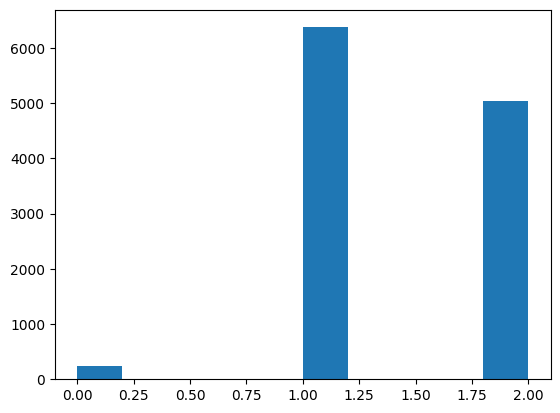

In [3]:
_ = plt.hist(np.argmax(data_y, axis=-1)[data_mask].flatten())

In [4]:
feat_list

array(['AGE', 'PTEDUCAT', 'APOE4', 'CDRSB', 'MMSE', 'ADAS11',
       'RAVLT_immediate', 'RAVLT_learning', 'ADAS13', 'RAVLT_forgetting',
       'RAVLT_perc_forgetting', 'ICV', 'WholeBrain', 'Ventricles',
       'Hippocampus', 'Fusiform', 'MidTemp', 'Entorhinal', 'serial',
       'PTMARRY_Divorced', 'PTMARRY_Married', 'PTMARRY_Never married',
       'PTMARRY_Unknown', 'PTMARRY_Widowed', 'PTRACCAT_Am Indian/Alaskan',
       'PTRACCAT_Asian', 'PTRACCAT_Black', 'PTRACCAT_Hawaiian/Other PI',
       'PTRACCAT_More than one', 'PTRACCAT_Unknown', 'PTRACCAT_White',
       'PTETHCAT_Hisp/Latino', 'PTETHCAT_Not Hisp/Latino',
       'PTETHCAT_Unknown'], dtype='<U26')

In [5]:
for i, name in enumerate(feat_list):
    vals = data_x_orig[data_mask == 1, i]
    mean = vals.mean()
    min_, max_ = vals.min(), vals.max()
    [mode_], _ = mode(vals)
    print(f"{name} - mean: {mean:.3f}, min: {min_:.3f}, max: {max_:.3f}, mode:{mode_:.3f}")

AGE - mean: 73.622, min: 55.000, max: 91.400, mode:70.600
PTEDUCAT - mean: 16.134, min: 4.000, max: 20.000, mode:16.000
APOE4 - mean: 0.440, min: 0.000, max: 2.000, mode:0.000
CDRSB - mean: 1.209, min: 0.000, max: 17.000, mode:0.000
MMSE - mean: 27.839, min: 2.000, max: 30.000, mode:30.000
ADAS11 - mean: 8.576, min: 0.000, max: 70.000, mode:6.000
RAVLT_immediate - mean: 38.262, min: 0.000, max: 75.000, mode:35.000
RAVLT_learning - mean: 4.651, min: -5.000, max: 14.000, mode:4.000
ADAS13 - mean: 13.599, min: 0.000, max: 85.000, mode:9.000
RAVLT_forgetting - mean: 4.186, min: -12.000, max: 15.000, mode:4.000
RAVLT_perc_forgetting - mean: 51.675, min: -500.000, max: 100.000, mode:100.000
ICV - mean: 1533516.573, min: 291.884, max: 2110290.000, mode:1473240.000
WholeBrain - mean: 1020276.024, min: 651686.000, max: 1486040.000, mode:1011816.266
Ventricles - mean: 40918.171, min: 5737.000, max: 158508.000, mode:42147.087
Hippocampus - mean: 6880.598, min: 2822.000, max: 11207.000, mode:6681.

In [6]:
# ICU

npz = np.load("../../data/real-world/physionet/selected_data.npz")

data_x = npz["data_x"]
data_x_orig = npz["data_x_orig"]
data_y = npz["data_y"]
data_t = npz["data_t"]
data_mask = npz["data_mask"]
feat_list = npz["feat_list"]

([idx],) = np.where(feat_list == "ICUType")
ICUType = data_x_orig[:, 0, idx]

sel = (ICUType == 4) | (ICUType == 3)

data_x = data_x[sel]
data_x_orig = data_x_orig[sel]
data_y = data_y[sel]
data_t = data_t[sel]
data_mask = data_mask[sel]

In [7]:
for i, name in enumerate(feat_list):
    vals = data_x_orig[data_mask == 1, i]
    mean = vals.mean()
    min_, max_ = vals.min(), vals.max()
    [mode_], _ = mode(vals)
    print(f"{name} - mean: {mean:.3f}, min: {min_:.3f}, max: {max_:.3f}, mode:{mode_:.3f}")

Age - mean: 61.560, min: 15.000, max: 90.000, mode:90.000
Gender - mean: 0.568, min: -1.000, max: 1.000, mode:1.000
ICUType - mean: 3.611, min: 3.000, max: 4.000, mode:4.000
GCS - mean: 9.752, min: 3.000, max: 15.000, mode:15.000
PaCO2 - mean: 39.849, min: 11.000, max: 100.000, mode:38.000


In [8]:
npz = np.load("../../data/real-world/physionet/physionet.npz")

data_x = npz["x"]
data_y = npz["y"]
data_t = npz["t"]
data_mask = npz["mask"]
feat_list = npz["labels"]

for i, name in enumerate(feat_list):
    vals = data_x[:, :, i][data_mask[:, :, i] == 1]
    mean = vals.mean()
    min_, max_ = vals.min(), vals.max()
    [mode_], _ = mode(vals)
    print(f"{name} - mean: {mean:.3f}, min: {min_:.3f}, max: {max_:.3f}, mode:{mode_:.3f}")

Age - mean: 64.247, min: 15.000, max: 90.000, mode:90.000
Gender - mean: 0.561, min: -1.000, max: 1.000, mode:1.000
Height - mean: 88.919, min: -1.000, max: 431.800, mode:-1.000
ICUType - mean: 2.760, min: 1.000, max: 4.000, mode:3.000
Weight - mean: 81.065, min: -1.000, max: 300.000, mode:70.000
Albumin - mean: 2.923, min: 1.000, max: 5.300, mode:3.100
ALP - mean: 116.792, min: 12.000, max: 2205.000, mode:61.000
ALT - mean: 393.953, min: 1.000, max: 11470.000, mode:17.000
AST - mean: 506.003, min: 4.000, max: 18430.000, mode:17.000
Bilirubin - mean: 2.911, min: 0.100, max: 47.700, mode:0.400
BUN - mean: 27.412, min: 0.000, max: 197.000, mode:14.000
Cholesterol - mean: 156.517, min: 28.000, max: 330.000, mode:111.000
Creatinine - mean: 1.505, min: 0.100, max: 22.100, mode:0.700
DiasABP - mean: 59.544, min: 0.000, max: 268.000, mode:56.000
FiO2 - mean: 0.542, min: 0.210, max: 1.000, mode:0.400
GCS - mean: 11.407, min: 3.000, max: 15.000, mode:15.000
Glucose - mean: 141.434, min: 10.000,